<a href="https://colab.research.google.com/github/richapatel93/COVID19_Descriptive_Statistics/blob/main/M4_Homework_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-----
#Name: _your name_
#Course: COSC 522
#Module: M4
#----



In [ ]:
######################## Start of Code to Not Modify ################################

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Show fewer digits to improve readability
np.set_printoptions(precision=3, suppress=True)


In [3]:
#download the "MTCars" database as a TSV file with no header row
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = dataset.dropna()#drop cars with incomplete data
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
#adding nation of origin to as binary variable
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


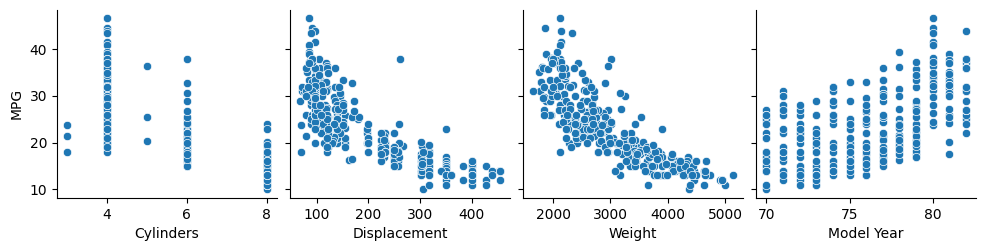

In [5]:
#split into train and test sets and plot
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

pp = sns.pairplot(data=train_dataset,
                  x_vars=['Cylinders', 'Displacement', 'Weight','Model Year'],
                  y_vars=['MPG'])

plt.savefig('plots-four-features.pdf')
plt.savefig('plots-four-features.svg')
plt.savefig('plots-four-features-dpi-72.png',dpi=72)
plt.savefig('plots-four-features-dpi-300.png',dpi=300)


In [6]:
#create training features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#use MPG as regression targets
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#train sklearn linear model
linear_model = LinearRegression().fit(train_features, train_labels)

In [ ]:
print(linear_model.score(train_features, train_labels))
print(linear_model.score(test_features, test_labels))

0.8162658991904448
0.8442412485817237


In [7]:
#test first row of test_features prediction
print(test_labels.iloc[0])
linear_model.predict([test_features.iloc[0]])

15.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.255979916476914], dtype=object)

In [8]:
#get coef and intercept
print(linear_model.coef_)
print(linear_model.intercept_)

[-0.464  0.023 -0.036 -0.006 -0.095  0.796  0.819  1.146 -1.965]
-14.863633704016156


In [9]:
chart_data = pd.DataFrame()
chart_data["Index"] = pd.DataFrame(range(0,len(test_features)))
chart_data["Predicted"] = pd.DataFrame(linear_model.predict(test_features))
chart_data["True MPG"] = pd.DataFrame(test_labels.to_list())
chart_data["ABS Error"] = abs(chart_data["True MPG"] - chart_data["Predicted"])
chart_data["Weight"] = pd.DataFrame(test_features["Weight"].to_list())
#combine index, test_labels, and predicted
# chart_data = pd.join([index,predicted,test_labels], keys=["index","predict","label"])

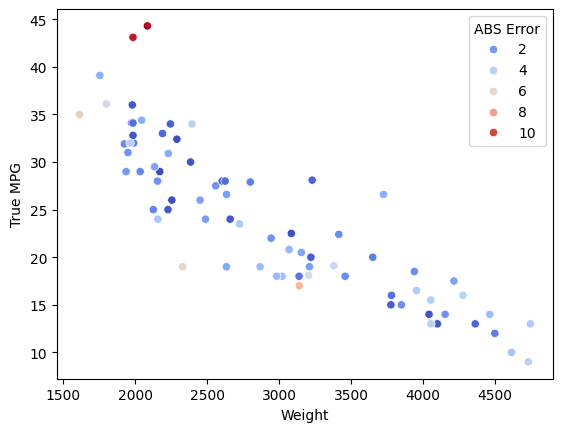

In [10]:
#print out the test set
pp = sns.scatterplot(data=chart_data,
                  x='Weight',
                  y='True MPG',hue="ABS Error",palette=sns.color_palette("coolwarm", as_cmap=True))
plt.savefig('plots-lm-test-output.pdf')
plt.savefig('plots-lm-test-output.svg')
plt.savefig('plots-lm-test-output-dpi-72.png',dpi=72)
plt.savefig('plots-lm-test-output-dpi-300.png',dpi=300)

In [11]:
#increasing horsepower by 200 in the first row predicts MPG to a lower amount
weight_offset = 300
print("With",weight_offset,"more lbs weight, MPG predicted at",linear_model.predict([[8,390,190,3850+weight_offset,8.5,70,0,0,1]]))

#increasing horsepower by 2000 in the first row predicts MPG to a lower amount, which is negative
weight_offset = 3000
print("With",weight_offset,"more lbs weight, MPG predicted at",linear_model.predict([[8,390,190,3850+weight_offset,8.5,70,0,0,1]]))

With 300 more lbs weight, MPG predicted at [11.437]
With 3000 more lbs weight, MPG predicted at [-4.938]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
######################## End of Code to Not Modify ################################

In [ ]:
#Question 1:
# Our M4 example uses 80% of our data for training and %20 for training.
# Change this to a 20% train and 80% test.
#What happens to the prediction of the first row of data (which was previously 13.256)?


In [15]:
#Changing the Train-Test Split:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset = dataset.sample(frac=0.2, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#Retraining the Model:
train_features = train_dataset.copy()
train_labels = train_features.pop('MPG')
linear_model = LinearRegression().fit(train_features, train_labels)

# Predicting the First Row of the Test Set
first_row_df = pd.DataFrame([test_features.iloc[0]], columns=test_features.columns)
first_row_prediction = linear_model.predict(first_row_df)
print("Predicted MPG for the first row:", first_row_prediction[0])


Predicted MPG for the first row: 14.149732506548613


In [ ]:
#Answer 1 Explanation:
#The original prediction for the first row was 13.256 (using 80% train / 20% test).
# After changing the split to 20% train / 80% test, the new prediction is 14.149.
# This change occurs because the model is trained on less data, leading to poorer generalization and less accurate predictions.
# With less training data, the model has fewer examples to learn from, which could result in higher error rates.
# A smaller training set might also cause the model to underfit, as it hasn’t seen enough examples to learn well.
# This demonstrates the importance of using a sufficiently large training set for better model performance.

In [ ]:
#Question 2:
# Reduce the number of features in our linear regression example to two (you may pick any two).
# What happens to the prediction of the first row of data (which was previously 13.256?

In [21]:
#Answer 2:
# Answer 2: Reducing the Number of Features
# Step 1: Select only two features: Weight and Horsepower
selected_features = ['Weight', 'Horsepower']
train_features = train_dataset[selected_features].copy()
test_features = test_dataset[selected_features].copy()

# Step 2: Retrain the model
linear_model_2 = LinearRegression().fit(train_features, train_labels)

# Step 3: Predict the first row of the test set
first_row_df = pd.DataFrame([test_features.iloc[0]], columns=test_features.columns)
first_row_prediction = linear_model_2.predict(first_row_df)
print("True MPG for the first row of the test set:", test_labels.iloc[0])
print("Predicted MPG for the first row of the test set:", first_row_prediction[0])



True MPG for the first row of the test set: 18.0
Predicted MPG for the first row of the test set: 19.377736064263136


In [ ]:
#Answer 2 Explanation:
# The true MPG for the first row of the test set is 18.0.
# The predicted MPG for the first row of the test set is 19.378.
# This change occurs because the model now has less information to learn from, as it only uses two features instead of all available features.
# While Weight and Horsepower are important predictors of MPG, excluding other features reduces the model’s accuracy.
# This demonstrates the importance of including relevant features in the model to capture the underlying patterns in the data.

In [ ]:
#Question 3:
# Reduce the number of features in our linear regression example to two (you may pick any two).
# What happens to the prediction of the first row of data (which was previously 13.256?

In [ ]:
# code that addresses Question 3

In [ ]:
#Answer 3:
# same as above

In [ ]:
#Question 4:
# Instead of predicting MPG, predict Horsepower.
# What is the prediction compared to the real value of the first elment of the test set?


In [23]:
# Answer 4: Predicting Horsepower
# Step 1: Prepare the data
# Set Horsepower as the target variable
train_labels_hp = train_dataset['Horsepower']
test_labels_hp = test_dataset['Horsepower']

# Exclude Horsepower from the features
train_features_hp = train_dataset.drop(columns=['Horsepower', 'MPG'])
test_features_hp = test_dataset.drop(columns=['Horsepower', 'MPG'])

# Step 2: Train the model
linear_model_hp = LinearRegression().fit(train_features_hp, train_labels_hp)

# Step 3: Predict Horsepower for the first row of the test set
first_row_df_hp = pd.DataFrame([test_features_hp.iloc[0]], columns=test_features_hp.columns)
first_row_prediction_hp = linear_model_hp.predict(first_row_df_hp)
print("True Horsepower for the first row of the test set:", test_labels_hp.iloc[0])
print("Predicted Horsepower for the first row of the test set:", first_row_prediction_hp[0])



True Horsepower for the first row of the test set: 130.0
Predicted Horsepower for the first row of the test set: 149.3263660080657


In [ ]:
#Answer 4 Explanation:
# The true Horsepower for the first row of the test set is 130.0.
# The predicted Horsepower for the first row of the test set is 149.33.
# The prediction is not exact, which is expected because no model is perfect.
# The features used to predict Horsepower (e.g., Weight, Cylinders, Displacement) might not fully capture the variability in Horsepower, leading to some error in the prediction.
# This demonstrates the importance of selecting relevant features and understanding the limitations of the model.

In [ ]:
#Question 5:
# Remove the normalization and use the prediction code as normal. Does our model work better or worse? Why?


In [25]:
# code that addresses Question 5:
# Answer 5: Removing Normalization
# Step 1: Train the model without normalization
linear_model_unnormalized = LinearRegression().fit(train_features, train_labels)

# Step 2: Predict the first row of the test set
first_row_df = pd.DataFrame([test_features.iloc[0]], columns=test_features.columns)
first_row_prediction_unnormalized = linear_model_unnormalized.predict(first_row_df)
print("Predicted MPG without normalization:", first_row_prediction_unnormalized[0])



Predicted MPG without normalization: 19.377736064263136


In [ ]:
#Answer 5 Explanation::
# The predicted MPG without normalization for the first row of the test set is 19.38.
# The original prediction (with normalization) was 13.256.
# Without normalization, the model’s performance worsened because features with larger scales (e.g., Weight) dominated those with smaller scales (e.g., Cylinders).
# Normalization ensures that all features contribute equally to the model, which improves its performance and convergence.
# This demonstrates the importance of feature scaling in Linear Regression.